In [33]:
using Distributions, ConjugatePriors
using Plots, StatsPlots

predictive(d::NormalInverseChisq) =
    LocationScale(d.μ, sqrt((1+d.κ)*d.σ2/d.κ), TDist(d.ν))


predictive (generic function with 1 method)

In [5]:
true_d = Normal(3., 1.5)

Normal{Float64}(μ=3.0, σ=1.5)

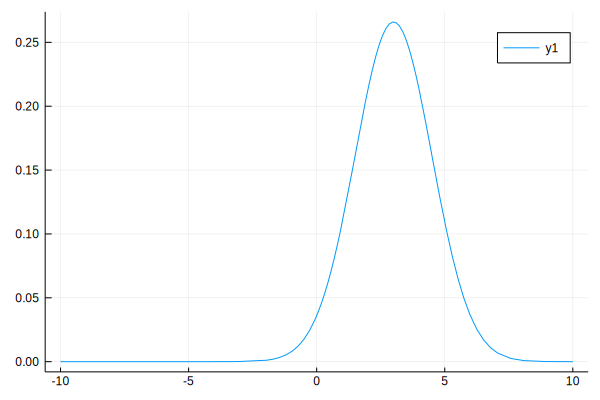

In [36]:
plot(true_d, -10, 10)

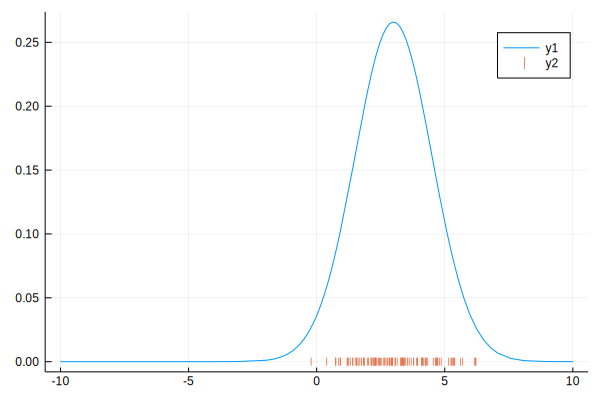

In [37]:
dat = rand(true_d, 100)
plot!(dat, zeros(size(dat)), seriestype=:scatter, markershape=:vline)

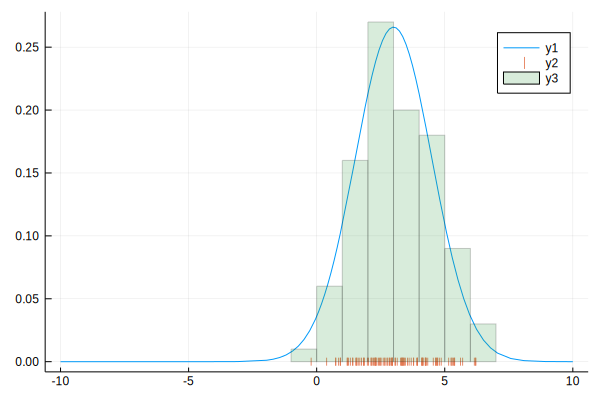

In [38]:
plot!(dat, seriestype=:histogram, normalize=true, alpha=0.2)

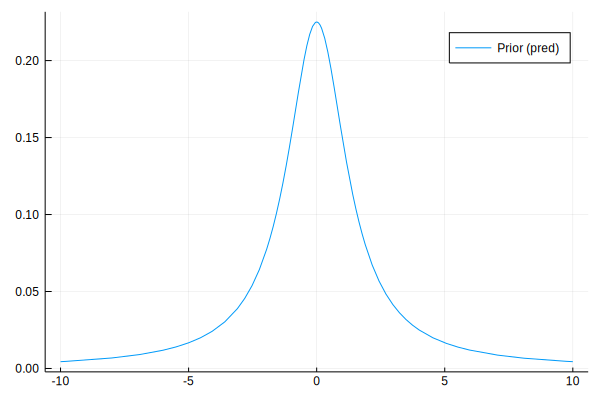

In [78]:
prior = NormalInverseChisq(0., 1., 1., 1.)
prior_plot = plot(predictive(prior), -10, 10, label="Prior (pred)")

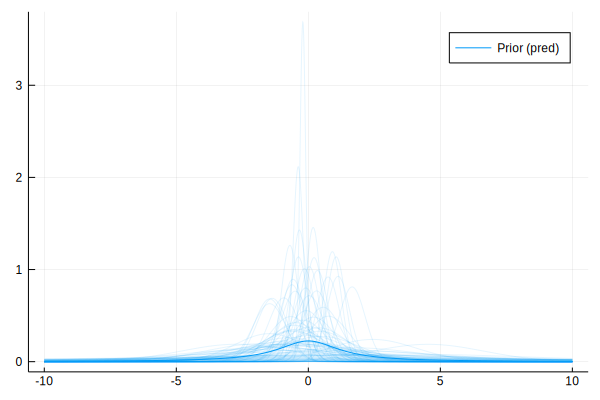

In [79]:
map(1:100) do _
    plot!(prior_plot, Normal(rand(prior)...), -10, 10, alpha=0.1, color=1, label="")
end
prior_plot

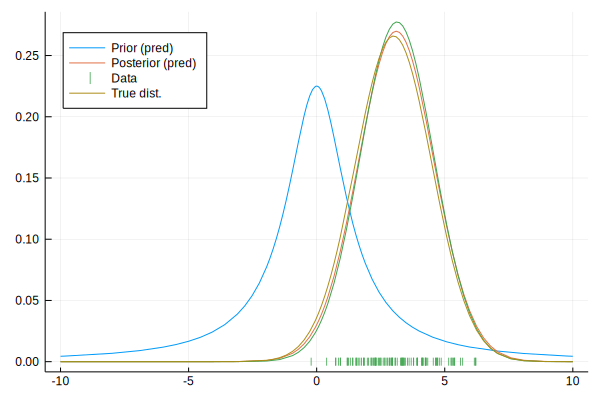

In [73]:
post = posterior(prior, Normal, dat)
plot(predictive(prior), -10, 10, label="Prior (pred)", legend=:topleft)
plot!(predictive(post), -10, 10, label="Posterior (pred)")
scatter!(dat, zeros(size(dat)), markershape=:vline, label="Data", color=3)
plot!(fit(Normal, dat), -10, 10, label="", color=3)
plot!(true_d, -10, 10, label="True dist.")

Normal{Float64}(μ=3.1374819435344765, σ=1.437802464076766)